In [4]:
import pandas as pd

# Define the file path
file_path = '/Users/lixingmin/Warp-firmware/data/quickly_sit.csv'

# Read the file using comma as the delimiter
# The 'usecols' parameter is not specified here because we first need to know the total number of columns
df_full = pd.read_csv(file_path, delimiter=',', header=None, engine='python')

# Remove any trailing semicolons in the data and convert all data to float
df_full = df_full.apply(lambda x: x.str.replace(';', '').astype(float) if x.dtype == 'object' else x)

# Now, select only the last three columns assuming they are the X, Y, and Z acceleration counts
df_acceleration = df_full.iloc[:, -3:]

# print(df_acceleration)

# Convert these counts to acceleration in g's for the 8g setting
df_acceleration = (df_acceleration / 8192) * 8  # Convert counts to g's

# Rename columns for clarity
df_acceleration.columns = ['X_g', 'Y_g', 'Z_g']

# Convert g's to m/s²
df_acceleration_m_s2 = df_acceleration * 9.81  # Convert g's to m/s²
df_acceleration_m_s2.columns = ['X_m/s²', 'Y_m/s²', 'Z_m/s²']

# Display the first few rows of the converted data
print(df_acceleration.head())
print(df_acceleration_m_s2.head())

        X_g       Y_g       Z_g
0 -0.015625 -0.982422  0.147461
1 -0.018555 -0.984375  0.148438
2 -0.018555 -0.986328  0.153320
3 -0.015625 -0.983398  0.152344
4 -0.015625 -0.985352  0.154297
     X_m/s²    Y_m/s²    Z_m/s²
0 -0.153281 -9.637559  1.446592
1 -0.182021 -9.656719  1.456172
2 -0.182021 -9.675879  1.504072
3 -0.153281 -9.647139  1.494492
4 -0.153281 -9.666299  1.513652


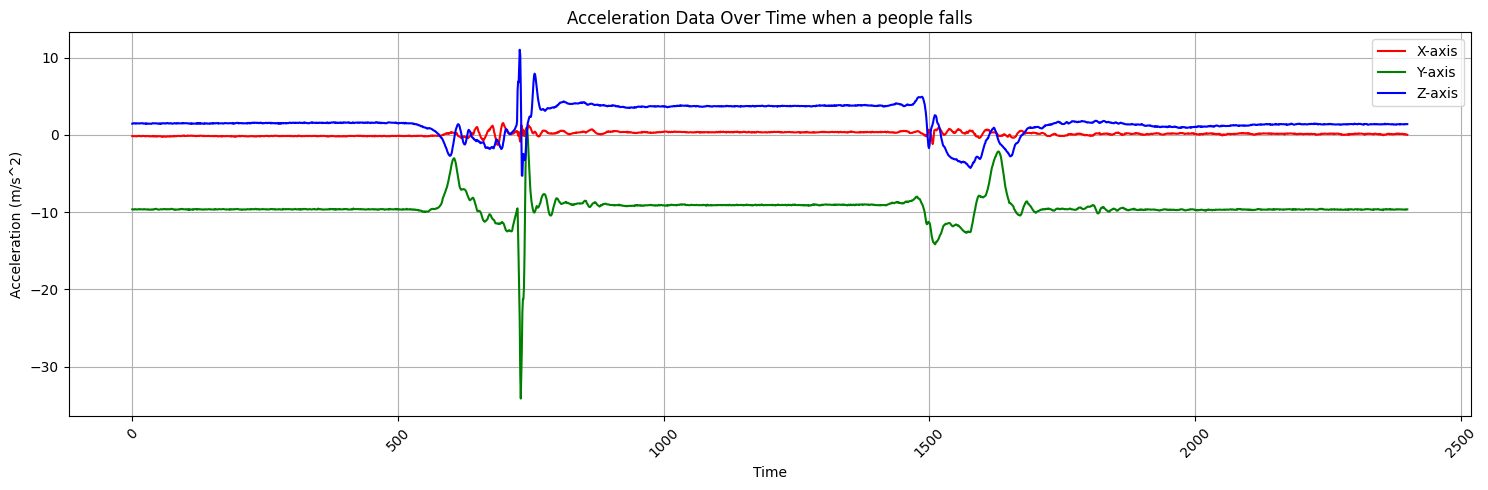

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 5])
plt.plot(df_acceleration_m_s2['X_m/s²'], label='X-axis', color='r')
plt.plot(df_acceleration_m_s2['Y_m/s²'], label='Y-axis', color='g')
plt.plot(df_acceleration_m_s2['Z_m/s²'], label='Z-axis', color='b')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Data Over Time when a people falls')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

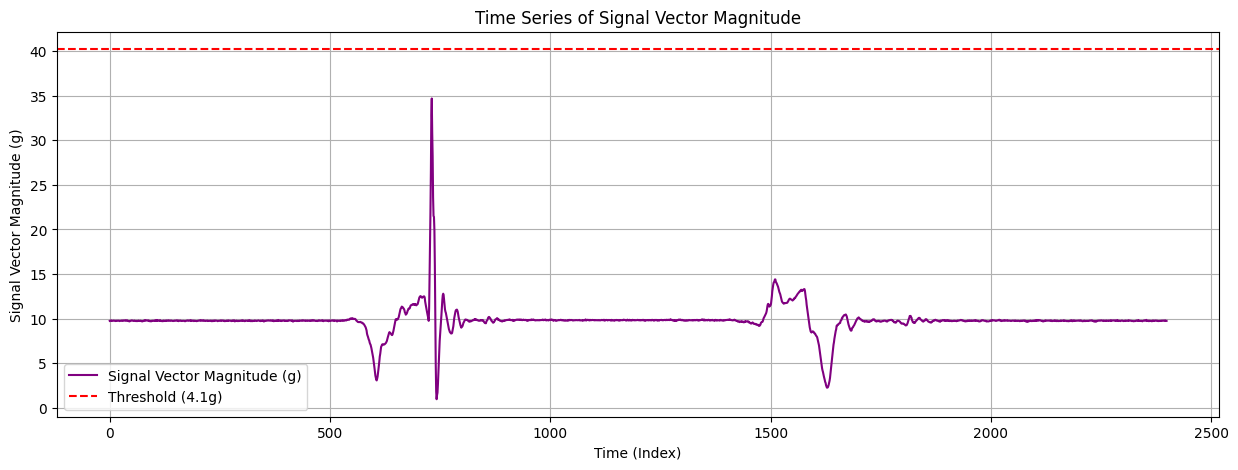

In [6]:
import numpy as np

def calculate_svm(df, columns=('X_g', 'Y_g', 'Z_g')):
    """Calculate the Signal Vector Magnitude from accelerometer data.

    Args:
        df (DataFrame): Pandas DataFrame containing the accelerometer data.
        columns (tuple): The names of the columns in the DataFrame that contain the X, Y, and Z data.

    Returns:
        ndarray: An array containing the SVM for each row in the DataFrame.
    """
    # Extract the acceleration data
    acc_data = df[list(columns)]
    # Calculate the SVM
    svm = np.sqrt((acc_data**2).sum(axis=1))
    return svm

# Calculate the SVM for the dataset
df_acceleration_m_s2['SVM'] = calculate_svm(df_acceleration_m_s2, columns=['X_m/s²', 'Y_m/s²', 'Z_m/s²'])

# Plot the SVM over time
# Plot the SVM over time
plt.figure(figsize=[15, 5])
plt.plot(df_acceleration_m_s2['SVM'], label='Signal Vector Magnitude (g)', color='purple')
plt.axhline(y=4.1 * 9.81, color='red', linestyle='--', label='Threshold (4.1g)')  # Adding the threshold line
plt.legend()
plt.xlabel('Time (Index)')
plt.ylabel('Signal Vector Magnitude (g)')
plt.title('Time Series of Signal Vector Magnitude')
plt.grid(True)
plt.show()